In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Post-processing

### Get predictions

In [26]:
ordered_verts = ['T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'L1', 'L2', 'L3', 'L4']
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'orange', 'brown', 'pink', 'purple', 'k', 'gray', 'olive']

In [2]:
predictions = np.load('./outputs/predictions.npz')
ids, coords, dists, labels = predictions.values()

ids.shape, coords.shape, dists.shape, labels.shape

((46,), (46, 13), (46, 13, 512, 1), (46, 13))

### Get ground-truth data

In [32]:
def get_gt(id_):
    path = f'./data/testing/targets/'
    # Coordinates
    coord_path = path + f'coordinates/{id_}.csv'
    coords = pd.read_csv(coord_path)
    # Heatmaps
    dist_path = path + f'heatmaps/{id_}.npy'
    dists = np.load(dist_path)
    display(coords)
    return coords, dists

In [53]:
def plot_dist(n):
    id_, coord, dist, label = ids[n], coords[n], dists[n, ..., 0], labels[n]
    print(id_)
    _, gt_targets = get_gt(id_)
    
    x = np.linspace(0, dist.shape[-1], num=dist.shape[-1])
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.axhline(0, ls='--', c='k')
    for channel in range(dist.shape[0]):
        vert = ordered_verts[channel]
        if label[channel] == 1:
            tgt = gt_targets[:, 0, channel]
            data = dist[channel]
            ax.plot(x, tgt, alpha=0.8, lw=3, color=colors[channel])
            ax.plot(x, data, ls='--', label=vert, lw=3, color=colors[channel])
    ax.legend()

28_05_2014_67_Sag


,Level,Coordinate
0,T9,252.813614
1,T4,155.613707
2,L1,349.582898
3,T5,173.198380
4,T7,211.306695
5,T12,323.535820
6,L3,403.673017
7,L2,376.183095
8,T10,275.281185
9,T6,191.829473


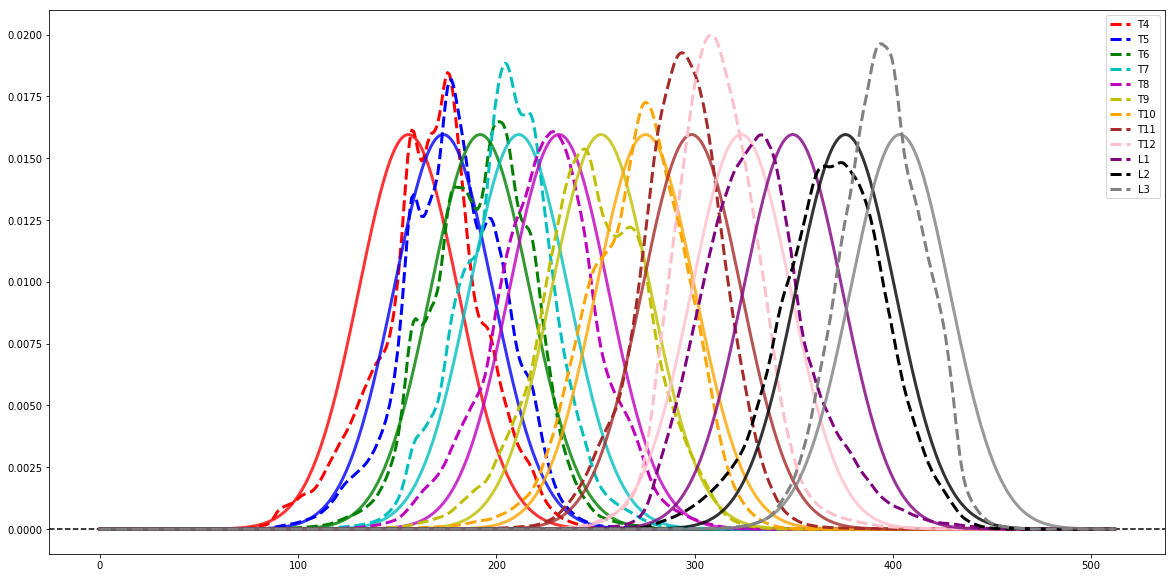

In [81]:
plot_dist(23)

In [49]:
def post(n):
    id_, coord, dist, label = ids[n], coords[n], dists[n, ..., 0], labels[n]
    print(id_)
    _, gt_targets = get_gt(id_)
    
    x = np.linspace(0, dist.shape[-1], num=dist.shape[-1])
    new_dist = np.zeros_like(dist)
    print(new_dist.shape)
    for pix in range(dist.shape[-1]):
        channel = np.argmax(dist[:, pix])
        new_dist[channel, pix] = np.max(dist[:, pix])
    
    print(new_dist.shape)
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.axhline(0, ls='--', c='k')
    for channel in range(dist.shape[0]):
        vert = ordered_verts[channel]
        if label[channel] == 1:
            tgt = gt_targets[:, 0, channel]
            data = new_dist[channel]
            ax.plot(x, tgt, alpha=0.8, lw=3, color=colors[channel])
            ax.plot(x, data, ls='--', label=vert, lw=3, color=colors[channel])
    ax.legend()

fr_553_LS_Sag


,Level,Coordinate
0,L4,240.605529
1,T11,127.974665
2,L1,169.362515
3,L2,188.007883
4,L3,212.837283
5,T12,150.888818


(13, 512)
(13, 512)


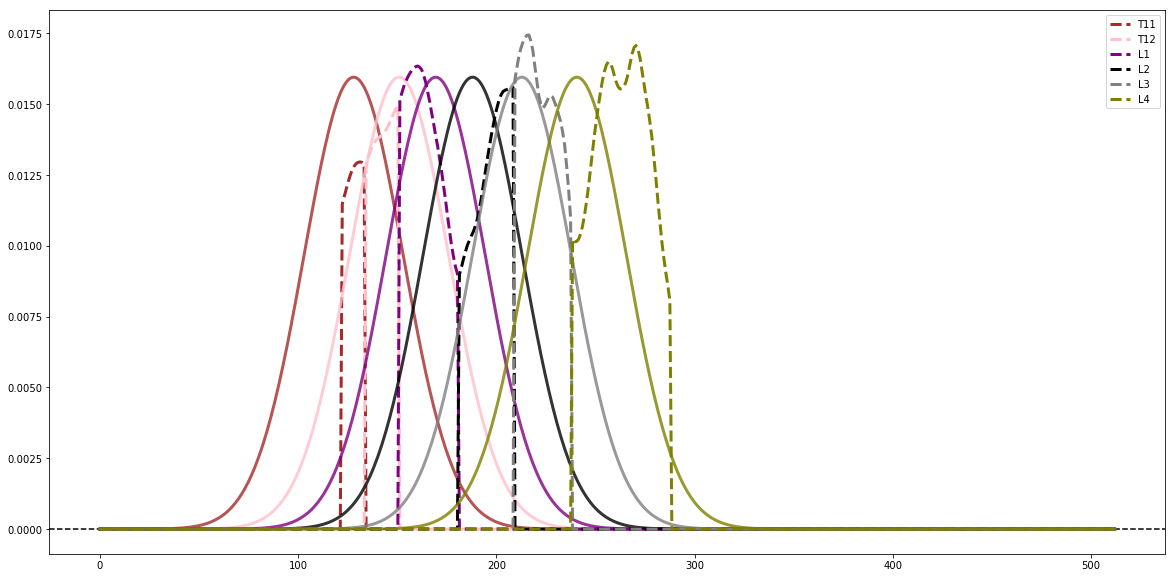

In [50]:
post(1)

In [86]:
from scipy.ndimage import zoom
import scipy.stats as ss

In [89]:
def plot_heatmap(n):
    id_, coord, dist, label = ids[n], coords[n], dists[n, ..., 0], labels[n]
    print(id_)
    _, gt_targets = get_gt(id_)
    
    P = ss.multivariate_normal.fit(dist)
    print(P)
    dist = zoom(input=dist, zoom=(10, 1), order=1)
    gt_targets = zoom(input=gt_targets[:, 0], zoom=(1, 10), order=1)
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(1-dist.T)
    ax[1].imshow(gt_targets)
    return dist

In [90]:
dist = plot_heatmap(23)

28_05_2014_67_Sag


,Level,Coordinate
0,T9,252.813614
1,T4,155.613707
2,L1,349.582898
3,T5,173.198380
4,T7,211.306695
5,T12,323.535820
6,L3,403.673017
7,L2,376.183095
8,T10,275.281185
9,T6,191.829473


AttributeError: 'multivariate_normal_gen' object has no attribute 'fit'